<p align="center">
  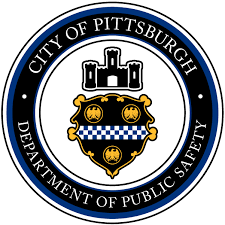
</p>
<center>
    <h1 style="font-family:Times New Roman; lineheight: .5;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;City of Pittsburgh</h1>
    <h1 style="font-family:Times New Roman;lineheight: .5;">&nbsp;&nbsp;&nbsp;&nbsp;Department of Public Safety</h1>
    <h2 style="font-family:Times New Roman;lineheight: .5;">&nbsp;&nbsp;&nbsp;&nbsp;911 Service Calls Data Analysis Assesment</h2>
    <h2 style="font-family:Times New Roman;lineheight: .5;">&nbsp;&nbsp;&nbsp;- By Aditya Nayak</h2>
</center>

<div style="font-family: Times New Roman; font-size: 16px; width: 90%; text-align: left;">
    <h3>Description:</h3>
    <p><b>Abstract:</b> The following dataset consists of records of 911 calls during the months of June 2024 to August 2024.</p>
    <p>The following is the dataset dictionary:
</div>

|Field Name|Description|
|----------|-----------|
|CALL_NO|Call number|
|DUPLICATED_TO_CALL_NO|Duplicated call number|
|REPORT_NO|"Report number (police| fire or ems)"|
|CALL_TYPE_FINAL|Final call type|
|CALL_TYPE_FINAL_D|Full call type category (based on CAD EOC manual codes)|
|ON_VIEW|On view incident indicator (Y or N)- Officer-initiated (Y) or Citizen-initiated (N)|
|CURR_DGROUP|Dispatch group for the call (PBP Zone) (CRRU = telephone reporting)|
|PRIORITY|Priority of call|
|DISPOSITION|Disposition of call|
|CALL_CREATED_DATE|Call received (911 calls) or user began typing in event entry- Date field only|
|CALL_CREATED_TIME|Call received (911 calls) or user began typing in event entry- Time field only|
|CALL_DISPATCH_DATE|First unit dispatched- Date field only|
|CALL_DISPATCH_TIME|First unit dispatched- Time field only|
|CALL_ENROUTE_DATE|First unit enroute- Date field only|
|CALL_ENROUTE_TIME|First unit enroute- Time field only|
|CALL_ONSCENE_DATE|First unit arrived onscene- Date field only|
|CALL_ONSCENE_TIME|First unit arrived onscene- Time field only|
|CALL_CLOSE_DATE|"Call closed- last unit cleared from scene| or call cancelled or closed as duplicate"|
|CALL_CLOSE_TIME|"Call closed- last unit cleared from scene| or call cancelled or closed as duplicate"|
|XCOORD|X map coordinate|
|YCOORD|Y map coordinate|
|LOCATION|Location of call|
|GEOGRAPHIC_AREA|The geographic area from the geo source for the call's location|
|MAP_PAGE|Census Tract of where incident occured|
|PRIMARY_UNIT|ID of primary unit assigned to call|
|BEAT_OR_STATION|"District (beat| station| etc.) of call. Set only for calls that were dispatched| with the value at the time of the last dispatch"|
|LOCATION_ADDRESS|Actual address for a common place name location- identical to LOCATION for other address types|
|callCreatedDateTime|Call received (911 calls) or user began typing in event entry- Merged date/time field|
|callDispatchDateTime|First unit dispatched- Merged date/time field|
|callEnRouteDateTime|First unit enroute- Merged date/time field|
|callOnsceneDateTime|First unit arrived onscene- Merged date/time field|
|callCloseDateTime|Call closed- Merged date/time field|
|Year|Year of CallCreatedDateTime|
|callMonth|Month of CallCreatedDateTime|
|weekday|Weekday of CallCreatedDateTime|
|Hour|Hour of CallCreatedDateTime|
|occuredShift|"Hourly grouping of PBP patrol shifts (Midnight-4am| 4am-8am| 8am-Noon| Noon-4pm| 4pm-8pm| 8pm-Midnight) based on Hour"|
|Shift|"PBP patrol shift (Night| Daylight| PM)"|
|ORIG_REPORT_NO|Original report number|
|reportYear|First two digits of report number (indicating year of report)|
|reportNum|Last five digits of report number|

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from summarytools import dfSummary, tabset
from datetime import datetime, timedelta
import pytz
import warnings


warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_excel("CityWide_CitizenCFS6.2024thru8.2024.xlsx")

In [2]:
df.head()

,CALL_NO,DUPLICATED_TO_CALL_NO,REPORT_NO,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,ON_VIEW,CURR_DGROUP,PRIORITY,DISPOSITION,XCOORD,YCOORD,LOCATION,GEOGRAPHIC_AREA,MAP_PAGE,PRIMARY_UNIT,BEAT_OR_STATION,LOCATION_ADDRESS,callCreatedDateTime,callDispatchDateTime,callEnRouteDateTime,callOnsceneDateTime,callCloseDateTime,Year,callMonth,weekday,Hour,occuredShift,Shift,ORIG_REPORT_NO,reportYear,reportNum
0,P240465748,NaN,24075886,DisorderlyPerson,DISORDERLY PERSON,N,CPD2,P1,No Report Needed,-80.001960,40.442951,"THE ROOSEVELT BUILDING, PGH",PP202-03,201.0,C3223,PGH2-D,"607 PENN AVE, PGH",2024-06-01 00:00:00,2024-06-01 00:14:00,2024-06-01 00:14:00,2024-06-01 00:23:00,2024-06-01 00:31:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075886,24,75886
1,P240465751,NaN,24075885,Child/Youth/JuvenileRelated,JUVENILE COMPLAINT,N,CPD5,P1,No Report Needed,-79.920367,40.471107,"N HIGHLAND AVE/JACKSON ST, PGH",PP527,1102.0,C3538,PGH5-3,"N HIGHLAND AVE/JACKSON ST, PGH",2024-06-01 00:04:00,2024-06-01 00:06:00,2024-06-01 00:06:00,2024-06-01 00:15:00,2024-06-01 00:18:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075885,24,75885
2,P240465769,NaN,24075887,Child/Youth/JuvenileRelated,JUVENILE COMPLAINT,N,CPD6,P1,No Report Needed,-80.052160,40.450469,"48 GREENWAY DR, PGH",PP609,2814.0,C3346,PGH6-1,"48 GREENWAY DR, PGH",2024-06-01 00:14:00,2024-06-01 00:18:00,2024-06-01 00:18:00,2024-06-01 00:29:00,2024-06-01 00:47:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075887,24,75887
3,P240465787,NaN,24075893,Child/Youth/JuvenileRelated,RUNAWAY JUVENILE,N,CPD1,P2,Report,-80.015289,40.472475,"353 MARSHALL AVE, PGH",PP117,2615.0,C3126R,PGH1-4,"353 MARSHALL AVE, PGH",2024-06-01 00:22:00,2024-06-01 00:33:00,2024-06-01 00:33:00,2024-06-01 01:16:00,2024-06-01 03:39:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075893,24,75893
4,P240465788,NaN,24075891,OrdinanceComplaint,ORDINANCE COMPLAINT,N,CPD4,P3,No Report Needed,-79.922548,40.429420,"SQUIRREL HILL SPORTS BAR, PGH",PP446,1414.0,C3427A,PGH4-1,"5832 FORWARD AVE, PGH",2024-06-01 00:23:00,2024-06-01 00:28:00,2024-06-01 00:28:00,2024-06-01 00:34:00,2024-06-01 00:38:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075891,24,75891


<div style="font-family: Times New Roman; font-size: 16px; width: 90%; text-align: left;">
    <p>The folllowing are the descriptive statistics of the dataset:</p>
</div>

In [3]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404657482. P2406695033. P2406694664. P2406694705. P2406694696. P2406694737. P2406694808. P2406694969. P24066949910. P24066950511. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)39,546 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2404908963. P2405767624. P2405085245. P2407027996. P2406764887. P2406697238. P2406697159. P24067189310. P24067280111. other,"38,779 (98.0%)2 (0.0%)2 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)765 (1.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACPUlEQVR4nO3aoY3cUBhG0Wcr8FHLIDypZytwbVPB9hO+YI3NJyh8MsS60jkVPOlKP/Dn5fl8DprWux/A+8QLEy9MvDDxwsQLEy9s2bbtY8653/0QXndd1/d5np8/5pz7cRxfdz+I1z0ej59jOJtp4oWJFyZemHhh4oWJFyZemHhh4oX5thn079vm4gekLmczbF2W5ffdj+A96xjj192P4D3OZph4YeKFiRcmXph4YeKFiRcmXph4YesY48/dj+A9JqEwZzPMJBRmEgpzNsPECxMvTLww8cLECxMvTLww8cLECzMJhZmEwpzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MJNQmEkozNkMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL0y8MHtemD0vzNkMs+eF2fPCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM2wZdu2jznnfl3X93men3c/iNetc879OI6vOed+92P4P85mmHhh4oWJFyZemHhh4oWJFyZemHhhvm2GmYTCnM0w8cLECxMvTLww8cL+Ah1MVlZfouNRAAAAAElFTkSuQmCC"">","38,779(98.0%)"
3,REPORT_NO[int64],Mean (sd) : 24102523.0 (15540.4)min < med < max:24075885.0 < 24102463.5 < 24129484.0IQR (CV) : 27115.5 (1551.0),"39,556 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABNklEQVR4nO3WMU7DMBhAYYOQksGs6cCCcoGeoCdg4gS+VzafgI0bcA8WBjJnjFT2SpFiJS5S3vvGxnL+9v1DH67Xa9DxPf73ALqPp6UHXde9xxhPay6Zpul3HMeP/cbS3hZDxxhPKaWfNZcMw/DW9/0hl+IoC78YukTTNM+VluI1xvi98myVH7nWwodQNvPWhdsldImSpcg5X1JKX2vO1lqgeZ7PIYRV85Z8txDKZm7b9pxS+lxzNuf8cvvZ3UPXUmuBcs6XbZMtK515y7v81w1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCEND/AEc0mmB0DXQAwAAAABJRU5ErkJggg=="">",0(0.0%)
4,CALL_TYPE_FINAL[object],"1. CheckonHouse,BusinessorWelfare2. Other3. Domestic4. Alarm-Burglar5. ParkingComplaint6. SuspiciousActivity/Person/Vehi7. Theft8. HitandRun9. DisorderlyPerson10. DisturbanceorDispute11. other","3,131 (7.9%)2,762 (7.0%)2,546 (6.4%)2,342 (5.9%)2,237 (5.7%)1,434 (3.6%)1,393 (3.5%)1,145 (2.9%)1,102 (2.8%)1,046 (2.6%)20,418 (51.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACP0lEQVR4nO3dMU7CcByGYTGOXRsGTuUJejZO4KkcZO6OM2koxAH7Ns8zM5C8yWfy/xk9XK/XN5r

<div style="font-family:Times New Roman;">
    <p style="font-size: 16px">Data wrangling:</p>
</div>

In [4]:
def crime_filter(label):
    if label == 'ASSAULT' or label == 'FIGHT' or label == 'ASSAULT - E0' or label == 'ASSAULT - NO INJURIES' or label == 'ASSAULT - E3' or label  == 'ASSAULT - E2' or label == 'ASSAULT - NO INJURIES REPORT' or label == 'ASSAULT - NO INJURIES/REPORT' or label == 'ASSAULT - REPORT 2019' or label == 'ASSAULT INJURIES' or label == 'ASSAULT - NO INJURIES REPORT ONLY' or label == 'ASSAULT - NO INJURIES/OCCD 3 DAYS AGO' or label == 'ASSAULT - REPORT/NO INJ':
        return "ASSAULT"
    elif label == 'AUDIBLE ALARM' or label == 'OPEN DOOR/WINDOW' or label == 'BURGLAR ALARM' or label == 'BURGLARY-HOME INVASION IN PROG/JUST OCCR' or label == 'BURGLARY REPORT':
        return "BURGLARY"
    elif label == 'DISTURBANCE' or label == 'HOUSE CHECK/WATCH' or label == 'NEEDS KEYS' or label == 'OPEN DOOR' or label == 'NEIGHBOR' or label == 'NEIGHBORHOOD PATROL' or label == 'NEIGHBOR DISPUTE' or label == 'DISPUTE--NEIGHBOR' or label == 'DOG CUSTODY' or label == 'CHILD FOUND' or label == 'CHILD FOUND' or label == 'CHILD ABUSE' or label == 'CHILD FOUND & 302' or label == 'CHILD CUSTODY' or label == 'CHILD CUSTODY DISPUTE' or label == 'CHILD ABUSE/NEGLECT' or label == 'DOMESTIC VIOLENCE' or label == 'VERBAL DOMESTIC' or label == 'DOMESTIC REPORT' or label == 'DOMESTIC RELATED' or label == 'WALKING  DOMESTIC VIOLENCE' or label == 'ROLLING DOMESTIC VIOLENCE':
        return "DOMESTIC / NEIGHBOR CALLS"
    elif label == 'HIT & RUN NO INJ - JUST OCCR' or label == 'HIT & RUN NO INJ -JUST OCCR' or label == 'STOLEN E-BIKE' or label == 'HIT & RUN NO INJ - IN PROGRESS/JUST OCCR' or label == 'HIT & RUN NO INJURIES - REPORT ONLY' or label == 'CRASH - VS PEDESTRIAN - E0' or label == 'CRASH - NO INJURIES /  REPORT' or label == 'ROAD CLOSED/OPENED' or label == 'TOW REQUEST' or label == 'CRASH REPORT' or label == 'CAR JACKING' or label == 'CRASH - NO INJURIES REPORT' or label == 'CRASH - NO INJURIES /  NO HAZARDS' or label == 'CRASH - ROLLOVER - E0' or label == 'CRASH - NO INJURIES /  REPORT ONLY' or label == 'BLOCKING DRIVEWAY' or label == 'CRASH - BUS - E0' or label == 'CRASH - NO INJURIES  OCCD EARLIER' or label == 'CRASH - NO INJURIES REPORT ONLY' or label == 'CRASH - INJURIES - E0' or label == 'ATTEMPTED VEH THEFT' or label == 'CRASH - NO INJURIES /  NO HAZARDS REPORT' or label == 'CRASH - UNKNOWN INJURIES - E2' or label == 'CRASH - REPORT' or label == 'CRASH - INJURIES - E2' or label == 'CRASH - HIGH MECHANISM' or label == 'CRASH - HAZARDS' or label == 'CRASH - INVOLVING A STRUCTURE' or label == 'CRASH - INJURIES' or label == 'ROAD HAZARD' or label == 'CRASH - UNKNOWN INJURIES' or label == 'CRASH - TRAPPED/PINNED' or label == 'PARKING COMPLAINT' or label == 'PARKING COMPLAINT HANDICAP SPOT' or label == 'PARKING NOTIFICATION' or label == 'PARKING' or label == 'THEFT FROM A VEHICLE' or label == 'SUSPICIOUS VEHICLE' or label == 'ABANDONED VEHICLE' or label == 'DISABLED VEHICLE' or label == 'RECOVERED STOLEN VEHICLE' or label == 'FIRE - VEHICLE' or label == 'REPOSSESSED VEHICLE REPORT' or label == 'VEHICLE LOCKOUT' or label == 'ABANDONED VEHICLE/STOLEN' or label == 'RECOVER STOLEN VEHICLE' or label == 'HIT & RUN NO INJ - ACTOR VEHICLE FOUND' or label == 'CRASH - SINKING VEHICLE - E0' or label == 'VEHICLE LEAKING GASOLINE' or label == 'SUSPICIOUS PARKED VEHICLE' or label == 'THEFT FROM A VEHICLE REPORT' or label == 'AUTO THEFT REPORT' or label == 'AUTO THEFT IN PROGRESS/JUST OCCURRED' or label == 'CRASH - BICYCLE/AUTO - E0' or label == 'AUTO THEFT ATTEMPT REPORT' or label == 'ATTEMP AUTO THEFT REPORT' or label == 'CRASH - MOTORCYCLE/AUTO - E0' or label == 'AUTO THEFT JUST OCCURRED':
        return "PARKING / TRAFFIC / VEHICLE COMPLAINTS"
    elif label == 'PSYCH - SUDDEN CHANGE - VIOLENT AND WEAP' or label == 'WEAPON-THREATENED' or label == 'PSYCH - WEAPONS - E3' or label == 'WEAPON SEEN' or label == 'PSYCH -ALTERED - UNK HX OF MH - WEAPON' or label == 'PSYCH - VIOLENT & WEAPONS - E3' or label == 'PSYCH - WEAPONS - E0' or label == 'PSYCH - WEAPON - E3' or label == 'PSYCH - VIOLENT & WEAPONS - E0' or label == 'PSYCH - WEAPONS  - E2' or label == 'PSYCH - WEAPONS - E2' or label == 'PSYCH - VIOLENT & WEAPONS - E2' or label == 'WEAPON-THREATENED OR SEEN' or label == 'FOUND BULLETS' or label == 'SPENT BULLET SHELL' or label == 'FOUND BULLET' or label == 'FIREARM RELINQUISHMENT' or label == 'FIREARM' or label == 'SHOTS FIRED/HEARD' or label == 'SHOTS HEARD BY SENSOR' or label == 'GUN-THREATENED OR SEEN' or label == 'GUNSHOT - E0' or label == 'GUNSHOT - E1' or label == 'GUN' or label == 'GUNSHOT - E2' or label == 'TURN OVER GUNS/PFA' or label == 'GUN MAG PICK UP' or label == 'FOUND GUN' or label == 'THEFT OF GUN REPORT' or label == 'GUNSHOT - SELF INFLICTED - E1' or label == 'GUNSHOT - E3' or label == 'FOUND HANDGUN' or label == 'GUNSHOT - SELF INFLICTED - E3' or label == 'GUN-SEEN' or label == 'GUNS' or label == 'GUNSHOT - SELF INFLICTED - E0' or label == 'LOST GUN':
        return "GUN / WEAPON CALL"
    elif label == 'STABBING - E0' or label == 'STABBING - E1' or label == 'STABBING - E3' or label == 'STABBING - E2' or label == 'STABBING - - E1':
        return "STABBING"
    elif label == 'OBVIOUS DEATH - E0' or label == 'OBVIOUS DEATH - E2' or label == 'DEATH QUESTIONABLE - E1' or label == 'EXPECTED DEATH - E2':
        return "DEATH / HOMICIDE"
    elif label == 'SOLICITING' or label == 'VICE COMPLAINT' or label == 'DRUGS COMPLAINT' or label == 'DRUG  PARAPHERNALIA FOUND' or label == 'DRUGS FOUND/PICK UP' or label == 'INTOX PERSON' or label == 'INTOX DRIVER' or label == 'INTOX PERSONS' or label == 'INTOX PERSON (S) 10' or label == 'INDECENT EXPOSURE':
        return "VICE"
    elif label == 'MONEY PACK ALARM' or label == 'THEFT REPORT' or label == 'THEFT IN PROGRESS/JUST OCCURRED' or label == 'ATTEMPTED THEFT' or label == 'THEFT JUST OCCURRED' or label == 'THEFT ATTEMPT REPORT' or label == 'ROBBERY-REPORT' or label == 'ROBBERY-IN PROGRESS/JUST OCCURRED' or label == 'SHOPLIFTER-IN PROGRESS/JUST OCC./VIOLENT' or label == 'SHOPLIFTER-REPORT OR IN CUSTODY FOR ID' or label == 'SHOPLIFTER- IN CUSTODY FOR ID' or label == 'SHOPLIFTER-REPORT' or label == 'SHOPLIFTER-IN PROGRESS/JUST OCC. - GOA' or label == 'SHOPLIFTER-IN CUSTODY FOR ID' or label == 'SHOPLIFTER-IN PROGRESS/JUST OCC' or label == 'SHOPLIFTER-IN PROGRESS/JUST OCC./' or label == 'SHOPLIFTER IN CUSTODY FOR ID':
        return "THEFT"
    elif label == 'JUVENILE COMPLAINT' or label == 'RUNAWAY JUVENILE' or label == 'JUVENILE LEFT AT SCHOOL':
        return "JUVENILE CALL COMPLAINTS"
    elif label ==  'PENETRATING CENTRAL WOUND - E0' or label == 'ELEVATOR RESCUE - EXPANDED' or label == 'BURNS - E1' or label == 'UNCONSCIOUS - E0' or label == 'SEIZURE - E1' or label == 'INJURED' or label == 'ALLERGIES - E3' or label == 'BREATHING  PROBLEMS - E1' or label == 'DIABETIC - COMBATIVE - E2' or label == 'NOT BREATHING - E0' or label == 'DIABETIC - COMBATIVE - E2' or label == 'DIABETIC - COMBATIVE - E1' or label == 'DIABETIC - E1' or label == 'DIABETIC - E2' or label == 'BREATHING UNCERTAIN - E0' or label == 'DIABETIC - ABNORMAL BEHAVIOR' or label == 'SICK/INJ' or label == 'SICK' or label == 'CHEST PAIN - E1' or label == 'ABDOMINAL PAIN - E3' or label == 'FIRE - COMMERCIAL CLASS' or label == 'FIRE - RESIDENTIAL CLASS' or label == 'POSSIBLE FIRE - COMMERCIAL CLASS' or label == 'ORDINANCE - ILLEGAL FIRE' or label == 'POSSIBLE FIRE - RESIDENTIAL CLASS' or label == 'CRASH - UNKNOWN INJURIES - FIRE' or label == 'FIRE - UNCATEGORIZED - EXPANDED' or label == 'CRASH - HIGH MECHANISM - FIRE':
        return "MEDICAL / FIRE EMERGENCY"
    elif label == 'HATE/HARASSMENT' or label == 'HARASSMENT REPORT' or label == 'HARASSMENT IN PROGRESS/JUST OCCURRED' or label == 'VERBAL THREAT-REPORT' or label == 'VERBAL THREAT IN PROGRESS/JUST OCCURRED' or label == 'VERBAL THREAT JUST OCCURRED' or label == 'THREATENED' or label == 'LANDLORD/TENNANT' or label == 'TENATE DISPUTE' or label == 'TRESSPASS-REPORT' or label == 'TRESPASS-JUST OCCURRED' or label == 'TRESPASS-IN PROGRESS' or label == 'TRESPASS-IN PROGRESS/JUST OCCURRED' or label == 'LL/TENNANT' or label == 'LANDLORD/TENANT DISPUTE' or label == 'LANDLORD/TENANT' or label == 'DISORDERLY PERSONS' or label == 'DISORDERLY PERSON' or label == 'ORDINANCE REPORT' or label == 'LOUD MUSIC' or label == 'ORDINANCE COMPLAINT' or label == 'NON DANGEROUS ANIMAL' or label == 'ANIMAL BITE - E2' or label == 'ANIMAL BITE - E3' or label == 'DEAD ANIMAL' or label == 'DANGEROUS ANIMAL' or label == 'ANIMAL BITE - E1' or label == 'ANIMAL BITE - E0' or label == 'TRAFFIC COMPLAINT' or label == 'TRAFFIC COMPLAINT ATV' or label == 'TRAFFIC STOP' or label == 'TRAFFIC COMPLAINT REPORT':
        return "ORDINANACE"
    elif label == 'HOSTAGE INCIDENT' or label == 'BOMB/POSS BOMB FOUND' or label == 'BOMB THREAT':
        return 'TERRORISM'
    elif label == 'FRAUD IN PROGRESS/JUST OCCURRED' or label == 'BANK RUN' or label =='FRAUD REPORT' or label == 'PROPERTY REPORT' or label == 'PROPERTY FOUND' or label == 'PROPERTY PICK UP' or label == 'RECOVERED PROPERTY' or label == 'CASINGS FOUND / PROPERTY DAMAGE  REPORT' or label == 'CREDIT CARD':
        return "FINANCIAL / PROPERTY CRIMES"
    elif label == 'FOOT PURSUIT' or label == 'PFA VIOLATION REPORT' or label == 'PFA VIOLATION JUST OCCURRED' or label == 'PFA VIOLATION IN PROGRESS/JUST OCCURRED' or label == 'FIGHT-UNKNOWN OR NO WEAPONS' or label == 'GRAFFITI-NON HATE CRIME' or label == 'PSYCH - SUDDEN CHANGE - VIOLENT' or label == 'PSYCH - VIOLENT - E3' or label == 'PSYCH - VIOLENT - E2' or label == 'PSYCH -ALTERED - UNK HX OF MH - VIOLENT' or label == 'PSYCH -ALTERED LOC - INJESTION - VIOLENT' or label == 'PSYCH -ALTERED - HX OF MH - VIOLENT' or label == 'PSYCH - JUMPER - VIOLENT - E2' or label == 'CRIMINAL MISCHIEF' or label == 'GRAFFITI-HATE CRIME' or label == 'PROTEST IN PROGRESS/JUST OCCURRED' or label == 'FIGHT-NO WEAPONS' or label == 'CRIMINAL MISCHIEF REPORT':
        return "VIOLENCE / INSUBORDINATION"
    elif label == 'POISONING - E2' or label == 'POISONING - ACCIDENTAL - E2' or label == 'OVERDOSE - ACCIDENTAL - E2' or label == 'OVERDOSE - E0' or label == 'OVERDOSE - ACCIDENTAL - E0' or label == 'OVERDOSE - E2' or label == 'OVERDOSE' or label == 'OVERDOSE - VIOLENT - E1' or label == 'OVERDOSE - VIOLENT - E0' or label == 'OVERDOSE - ACCIDENTAL - E1' or label == 'OVERDOSE - VIOLENT - E2':
        return "LETHAL INGESTION CALL"
    elif label == 'ABDUCTION IN PROGRESS/JUST OCCURRED' or label == 'CHILD MISSING' or label == 'PERSON MISSING' or label == 'PERSON MISSING FOLLOW UP':
        return "KIDNAPPING / AMBER ALERT / MISSING"
    else:
        return "MISDEMEANOR / OTHER CALL"

In [5]:
# Function to convert Timedelta to HH:MM:SS
def timedelta_to_hhmmss(delta):
    total_seconds = delta.total_seconds()
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

In [6]:
df["TimetoArrive"] = df['callOnsceneDateTime'] - df['callEnRouteDateTime']
df["MainComplaintCategory"] = df.CALL_TYPE_FINAL_D.apply(crime_filter)

In [7]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404657482. P2406695033. P2406694664. P2406694705. P2406694696. P2406694737. P2406694808. P2406694969. P24066949910. P24066950511. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)39,546 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2404908963. P2405767624. P2405085245. P2407027996. P2406764887. P2406697238. P2406697159. P24067189310. P24067280111. other,"38,779 (98.0%)2 (0.0%)2 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)765 (1.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACPUlEQVR4nO3aoY3cUBhG0Wcr8FHLIDypZytwbVPB9hO+YI3NJyh8MsS60jkVPOlKP/Dn5fl8DprWux/A+8QLEy9MvDDxwsQLEy9s2bbtY8653/0QXndd1/d5np8/5pz7cRxfdz+I1z0ej59jOJtp4oWJFyZemHhh4oWJFyZemHhh4oX5thn079vm4gekLmczbF2W5ffdj+A96xjj192P4D3OZph4YeKFiRcmXph4YeKFiRcmXph4YesY48/dj+A9JqEwZzPMJBRmEgpzNsPECxMvTLww8cLECxMvTLww8cLECzMJhZmEwpzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MJNQmEkozNkMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL0y8MHtemD0vzNkMs+eF2fPCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM2wZdu2jznnfl3X93men3c/iNetc879OI6vOed+92P4P85mmHhh4oWJFyZemHhh4oWJFyZemHhhvm2GmYTCnM0w8cLECxMvTLww8cL+Ah1MVlZfouNRAAAAAElFTkSuQmCC"">","38,779(98.0%)"
3,REPORT_NO[int64],Mean (sd) : 24102523.0 (15540.4)min < med < max:24075885.0 < 24102463.5 < 24129484.0IQR (CV) : 27115.5 (1551.0),"39,556 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABNklEQVR4nO3WMU7DMBhAYYOQksGs6cCCcoGeoCdg4gS+VzafgI0bcA8WBjJnjFT2SpFiJS5S3vvGxnL+9v1DH67Xa9DxPf73ALqPp6UHXde9xxhPay6Zpul3HMeP/cbS3hZDxxhPKaWfNZcMw/DW9/0hl+IoC78YukTTNM+VluI1xvi98myVH7nWwodQNvPWhdsldImSpcg5X1JKX2vO1lqgeZ7PIYRV85Z8txDKZm7b9pxS+lxzNuf8cvvZ3UPXUmuBcs6XbZMtK515y7v81w1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCEND/AEc0mmB0DXQAwAAAABJRU5ErkJggg=="">",0(0.0%)
4,CALL_TYPE_FINAL[object],"1. CheckonHouse,BusinessorWelfare2. Other3. Domestic4. Alarm-Burglar5. ParkingComplaint6. SuspiciousActivity/Person/Vehi7. Theft8. HitandRun9. DisorderlyPerson10. DisturbanceorDispute11. other","3,131 (7.9%)2,762 (7.0%)2,546 (6.4%)2,342 (5.9%)2,237 (5.7%)1,434 (3.6%)1,393 (3.5%)1,145 (2.9%)1,102 (2.8%)1,046 (2.6%)20,418 (51.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACP0lEQVR4nO3dMU7CcByGYTGOXRsGTuUJejZO4KkcZO6OM2koxAH7Ns8zM5C8yWfy/xk9XK/XN5r

<div style="font-family: Times New Roman; font-size: 16px; width: 90%; text-align: left;">
    <h3>1) Crime Statistics based on months</h3>
</div>

In [8]:
df_june = df[df.callMonth == 6]
df_july = df[df.callMonth == 7]
df_aug = df[df.callMonth == 8]

tabset({
    'June crime call stats': dfSummary(df_june).to_html(),
    'July crime call stats': dfSummary(df_july).to_html(),
    'August crime call stats': dfSummary(df_aug).to_html()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404657482. P2405333823. P2405333234. P2405333225. P2405333326. P2405333437. P2405333528. P2405333459. P24053335310. P24053336511. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)12,993 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2405085243. P2404908964. P2405221325. P2405222306. P2405346667. P2405356128. P2405360799. P24053634910. P24053695111. other,"12,751 (98.1%)2 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)241 (1.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACPUlEQVR4nO3aoY3cUBhG0Wcr8FHLIDypZytwbVPB9hO+YI3NJyh8MsS60jkVPOlKP/Dn5fl8DprWux/A+8QLEy9MvDDxwsQLEy9s2bbtY8653/0QXndd1/d5np8/5pz7cRxfdz+I1z0ej59jOJtp4oWJFyZemHhh4oWJFyZemHhh4oX5thn079vm4gekLmczbF2W5ffdj+A96xjj192P4D3OZph4YeKFiRcmXph4YeKFiRcmXph4YesY48/dj+A9JqEwZzPMJBRmEgpzNsPECxMvTLww8cLECxMvTLww8cLECzMJhZmEwpzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MJNQmEkozNkMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL0y8MHtemD0vzNkMs+eF2fPCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM2wZdu2jznnfl3X93men3c/iNetc879OI6vOed+92P4P85mmHhh4oWJFyZemHhh4oWJFyZemHhhvm2GmYTCnM0w8cLECxMvTLww8cL+Ah1MVlZfouNRAAAAAElFTkSuQmCC"">","12,751(98.1%)"
3,REPORT_NO[int64],Mean (sd) : 24084458.4 (4985.8)min < med < max:24075885.0 < 24084448.0 < 24093131.0IQR (CV) : 8634.0 (4830.6),"13,003 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABNUlEQVR4nO3XMW6DMBhAYbeqBIO7kqEbF0gv0EPkBF57LU7QrTfqUGYWJCR6gki2AtTJe98a5PzS+7HE07quQY/v+b8H0DFerv3Qdd0lxnjKOWSapt9xHL9ynt3r3BI1zHC0q6FjjKeU0k/OIcMwvOX+4V7nlsRr2/acUvreeoY93bqcV0Pfm8IF+thjhpIYIZTdFre+IJuEnuf5ve/7z5xnl2U5hxCyBr43JTFCOPa22CR00zSve7xNNSxQDTNsoeqre68FqmWGI5eo6tCP7shF9jsawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBriD0yodnJRWVSuAAAAAElFTkSuQmCC"">",0(0.0%)
4,CALL_TYPE_FINAL[object],"1. CheckonHouse,BusinessorWelfare2. Other3. Domestic4. Alarm-Burglar5. ParkingComplaint6. SuspiciousActivity/Person/Vehi7. Theft8. HitandRun9. DisturbanceorDispute10. DisorderlyPerson11. other","1,057 (8.1%)916 (7.0%)869 (6.7%)849 (6.5%)728 (5.6%)470 (3.6%)407 (3.1%)367 (2.8%)365 (2.8%)338 (2.6%)6,637 (51.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACPklEQVR4nO3dMWrCcByG4aZ0zBocPFVP4Nk8QU/Voc7Z01nEKB1s3vA8s4Pwwlf4/4QOy7K80fT+31+AvxMvTLww8cLECxMvTLywY

In [9]:
#dfSummary(df_june[(df_june.MainComplaintCategory == 'VIOLENCE / INSUBORDINATION') & (df_june.DISPOSITION == 'Report')])
#dfSummary(df_july[(df_july.MainComplaintCategory == 'TERRORISM') & (df_july.DISPOSITION == 'Report')])
#dfSummary(df_aug[df_aug.DISPOSITION == 'Report'])

tabset({
    'June crime report stats': dfSummary(df_june[df_june.DISPOSITION == 'Report']).to_html(),
    'July crime report stats': dfSummary(df_july[df_july.DISPOSITION == 'Report']).to_html(),
    'August crime report stats': dfSummary(df_aug[df_aug.DISPOSITION == 'Report']).to_html()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404657872. P2405334123. P2405334474. P2405334565. P2405335956. P2405336427. P2405336478. P2405336619. P24053368510. P24053369811. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)3,648 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2405246673. P2405331164. P2405325705. P2405315486. P2405294767. P2405284858. P2405260329. P24052571410. P24052554111. other,"3,566 (97.5%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)83 (2.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACQklEQVR4nO3aoW3sQBhG0fEqcKi1IDyvnlTg2lxB+gkPiLH5PhS+WmJd6ZwKRrrSD/x5eTweg6bb1Q/gdeKFiRcmXph4YeKFiRe2rOv6Oee8X/0Qnnee5+9xHF9vc877tm0/Vz+I5+37/j6Gs5kmXph4YeKFiRcmXph4YeKFiRcmXphvm0F/3zYXPyB1OZtht2VZ/l39CF5zG2N8XP0IXuNshokXJl6YeGHihYkXJl6YeGHihYkXdhtjfF/9CF5jEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MJNQmEkozNkMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2QwzCYWZhMKczTDxwsQLEy9MvDDxwsQLEy9MvDDxwsQLs+eF2fPCnM0we16YPS/M2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2Qxb1nX9nHPexxjjPM/f4zi+rn4Uz3mbc963bfsZY4x939+vfhDPczbDxAsTL0y8MPHCxAsTL0y8MPHCxAvzbTPMJBTmbIaJFyZemHhh4oWJF/YfPudYG98+aY0AAAAASUVORK5CYII="">","3,566(97.5%)"
3,REPORT_NO[int64],Mean (sd) : 24084540.7 (4985.9)min < med < max:24075892.0 < 24084647.0 < 24093128.0IQR (CV) : 8524.2 (4830.5),"3,658 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABRUlEQVR4nO3YsW3DMBBGYTowoObSykUaQwskC2QIT8A2a2kCT5E93LiIajUCBCgLxDBph5TI/321IBzwTiSg3bIsDvV7WXsA5LFfe4A1tG17MrNDyLPjOP4Mw3BOPVNqkqHN7OC9v4Y82/f9W+p5cuDoFkFoEZs+uhXv0lQ2Hbq0uzRmMZ2LW85nl/5m6MgXH83s8ugQtYhZTOfilvPZpb8ZOvLFn97770eH+A/TNH10XfcV8uw8z+/OueAgNdj00R2jaZrXmMVMPU+InMtZTegS5VxOQt9Ry5VA6DtKvBL+kj10LV9IabKHruULKQ2/QEUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaxC+VwHl2ekTgqgAAAABJRU5ErkJggg=="">",0(0.0%)
4,CALL_TYPE_FINAL[object],1. Theft2. HitandRun3. Vehicle-Theft4. PropertyReport5. Fraud6. Vehicle-TheftFrom7. Harassment8. Domestic9. CRASHN10. Shoplifter11. other,"340 (9.3%)313 (8.6%)249 (6.8%)230 (6.3%)161 (4.4%)153 (4.2%)148 (4.0%)142 (3.9%)132 (3.6%)119 (3.3%)1,671 (45.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACN0lEQVR4nO3dsW3CYBhF0ThK6daiYKpM4NmYIFOlCLV7ZwAsjFIQX3FOTYF0pVf8H0qGdV3faHr/7y/A34kXJl6YeGHihYkXJl7YME3T5ziOp70PLsvyc71ev57xpXjMxziOp

<div style="font-family: Times New Roman; font-size: 16px; width: 90%; text-align: left;">
    <h3>2) Crime Statistics based on call priority</h3>
</div>

In [10]:
df_p0 = df[df.PRIORITY == 'P0']
df_p1 = df[df.PRIORITY == 'P1']
df_p2 = df[df.PRIORITY == 'P2']
df_p3 = df[df.PRIORITY == 'P3']
df_p4 = df[df.PRIORITY == 'P4']
df_p5 = df[df.PRIORITY == 'P5']

tabset({
    'P0': dfSummary(df_p0).to_html(),
    'P1': dfSummary(df_p1).to_html(),
    'P2': dfSummary(df_p2).to_html(),
    'P3': dfSummary(df_p3).to_html(),
    'P4': dfSummary(df_p4).to_html(),
    'P5': dfSummary(df_p5).to_html()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404657822. P2406644793. P2406645234. P2406646615. P2406648826. P2406649277. P2406650738. P2406650939. P24066511010. P24066528811. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)3,699 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2404908963. P2406685984. P2407048005. P2407035386. P2407020927. P2407003228. P2406946049. P24069151410. P24068946311. other,"3,598 (97.0%)2 (0.1%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)101 (2.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACSElEQVR4nO3aIW7jUBhG0eeo8FEroHy6nq7Aa/MKup/hBTU2z6BKA6MQ60rnoMAnXekH/rI8Ho9B0+3qB/A68cLECxMvTLww8cLEC1vWdf2cc96vfgjPOc/z5ziOrzHGeJtz3rdt+776UTxn3/f339/OZph4YeKFiRcmXph4YeKFiRcmXph4Yb5txvz/bXPxB6QuZzPstizLx9WP4DW3Mcafqx/Ba5zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCbmOMv1c/gteYhMKczTCTUJhJKMzZDBMvTLww8cLECxMvTLww8cLECxMvzCQUZhIKczbDTEJhJqEwZzNMvDDxwsQLEy9MvDDxwsQLEy9MvDCTUJhJKMzZDDMJhZmEwpzNMPHCxAsTL0y8MPHCxAsTL0y8MPHCTEJhJqEwZzPMJBRmEgpzNsPECxMvTLww8cLECxMvTLww8cLECzMJhZmEwpzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsNMQmEmoTBnM0y8MPHCxAsTL0y8MPHCxAsTL0y8MPHC7Hlh9rwwZzPMnhdmzwtzNsPECxMvTLww8cLECxMvTLww8cLECzMJhZmEwpzNMJNQmEkozNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/MJBRmEgpzNsOWdV0/55z3McY4z/PnOI6vqx/Fc97mnPdt277HGGPf9/erH8TznM0w8cLECxMvTLww8cLECxMvTLww8cJ82wwzCYU5m2HihYkXJl6YeGHihf0DgG9YGz1mkHsAAAAASUVORK5CYII="">","3,598(97.0%)"
3,REPORT_NO[int64],Mean (sd) : 24102085.6 (15664.3)min < med < max:24075889.0 < 24101654.0 < 24129345.0IQR (CV) : 27466.0 (1538.7),"3,709 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABTUlEQVR4nO3YMW6DMBiG4T9VJRZ3JUOXigukF+ghegKvvRYnyClyjy4dwuwFCYkOXYtkC5tY/t5nBVkmr7FRTuu6Gtr39OgJ4BjPWxf6vv90zp1jBgkh3KdpuuabFnLbDO2cO3vvf2IGGcfxNd+UUAJbtwhCi9jculPM8/w+DMNXzL0p53kN3wk1zCGHLKG7rnspcZ7X8J1QwxzM9i+4LKFR3t4F10zoUsdHK5oJXer4aMXhoVPevGVZLmYWFa8GKc9mZhZCeHPOfcfcu/e3ODx04pv3UWIOpRZbyrOZ/T2f9/4We2/suP9pZutOUcNiOxp/mIggtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILSIXwoHf3wxyZu3AAAAAElFTkSuQmCC"">",0(0.0%)
4,CALL_TYPE_FINAL[object],1. Domestic2. Weapon-ThreatenedorSeen3. Alarm-Panic4. Overdose5. MedicalRelatedCall6. PsychologicalIncident7. Domestic-PFAServiceorViolation8. CRASHZ9. Alarm-HoldUp10. Death11. other,"1,480 (39.9%)677 (18.3%)270 (7.3%)230 (6.2%)134 (3.6%)133 (3.6%)121 (3.3%)118 (3.2%)62 (1.7%)57 (1.5%)427 (11.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACRklEQVR4nO3du00DURRFUWwRTmo5oCoqcG2ugKoIcDy5iSAZ4Q+yPG9La1Uw0pZO8C6fz

<div style="font-family: Times New Roman; font-size: 16px; width: 90%; text-align: left;">
    <h3>3) Crime Statistics based on shifts</h3>
    <p>The shifts are classified into 3 categories:
        <ol>
            <li><b>Daylight</b>: Between 8:00 - 16:00 hours</li>
            <li><b>PM</b>: Between 16:00 - 00:00 hours</li>
            <li><b>Night</b>: Between 00:00 - 08:00 hours</li>
        </ol>
</div>

In [11]:
df_daylight = df[df.Shift == 'Daylight']
df_night = df[df.Shift == 'Night']
df_pm = df[df.Shift == 'PM']

tabset({
    'Daylight': dfSummary(df_daylight).to_html(),
    'PM': dfSummary(df_pm).to_html(),
    'Night': dfSummary(df_night).to_html()    
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CALL_NO[object],1. P2404663712. P2406705793. P2406705754. P2406705785. P2406705896. P2406705877. P2406706078. P2406705989. P24067061010. P24067062011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)15,641 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,DUPLICATED_TO_CALL_NO[object],1. nan2. P2406780793. P2406418624. P2406479375. P2406574476. P2406608057. P2406610928. P2406645619. P24066688010. P24066717411. other,"15,433 (98.6%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)209 (1.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACMklEQVR4nO3asY3jQBQFwaEgky4h4/zbeDYCxaYILp/z15Ds8bUxiM6ggaoIBmjgG3zc3u/3oOmy+gGcJ16YeGHihYkXJl6YeGHbcRzf+77fVj+Ez8w5n9d932/3+/1n9WP4zOPx+ONshokXJl6YeGHihYkXJl6YeGHihYkX5ttm1JzzufkBqcvZDLts2/a1+hGccxlj/F39CM5xNsPECxMvTLww8cLECxMvTLww8cLEC7uMMf6vfgTnmITCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2QwzCYWZhMKczTDxwsQLEy9MvDDxwsQLEy9MvDDxwkxCYSahMGczzCQUZhIKczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczTCTUJhJKMzZDBMvTLww8cLECxMvTLww8cLECxMvzCQUZhIKczbDTEJhJqEwZzNMvDDxwsQLEy9MvDDxwsQLEy9MvDDxwux5Yfa8MGczzJ4XZs8LczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczTCTUJhJKMzZDBMvTLww8cLECxMvTLww8cLECxMvzCQUZhIKczbDtuM4vscY4/V6/Vv9GD5z3ff9tvoRnONshokXJl6YeGHihYkXJl6YeGHihYkXdp1zPlc/gnNMQmHOZph4YeKFiRcmXph4Yb+GNkUMoeIMMgAAAABJRU5ErkJggg=="">","15,433(98.6%)"
3,REPORT_NO[int64],Mean (sd) : 24102662.9 (15592.1)min < med < max:24075992.0 < 24102916.0 < 24129164.0IQR (CV) : 27133.0 (1545.8),"15,651 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAABOklEQVR4nO3WvU3EMABAYYOQ0oQ2V9B5AViACaiYIC0zpfMETEVB6jSRIoUe6SRb+cHHe18by/H5JfHdresa9P/d//UCdI6Haxe6rntv2/aSM8k0Td/jOH7mjD1q3qPUst6t67gaum3bS9/3XzkTp5SecsYdOe9RStY7DMNbjDErRghlD8bWfbsausQ8zy8xxo+cscuyPIcQshZcooY3r2max9wYIZQ9GFv3bZfQJT8wpfS6xz1/u7UvRQjn7pt/xiB2eaNvTQ1HzdmqDn1UkBqOmrNVHZoY5Cie0RCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGuIHCz56BSCXjB4AAAAASUVORK5CYII="">",0(0.0%)
4,CALL_TYPE_FINAL[object],"1. CheckonHouse,BusinessorWelfare2. ParkingComplaint3. Other4. Alarm-Burglar5. Domestic6. Theft7. HitandRun8. PropertyReport9. DisorderlyPerson10. DisturbanceorDispute11. other","1,198 (7.7%)1,130 (7.2%)912 (5.8%)767 (4.9%)750 (4.8%)730 (4.7%)602 (3.8%)530 (3.4%)467 (3.0%)458 (2.9%)8,107 (51.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAAsTAAALEwEAmpwYAAACP0lEQVR4nO3dMU7CcByGYTGOXQkDp/IEPVtP4KkcZO5eZwIpxAH7Ns8zM5C8yWfy/xk9LMvyRtP7f38B/k68MPHCxAsTL0y8MPHCDsfj8XMYhtPah+Z5/

In [12]:
df.head()

,CALL_NO,DUPLICATED_TO_CALL_NO,REPORT_NO,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,ON_VIEW,CURR_DGROUP,PRIORITY,DISPOSITION,XCOORD,YCOORD,LOCATION,GEOGRAPHIC_AREA,MAP_PAGE,PRIMARY_UNIT,BEAT_OR_STATION,LOCATION_ADDRESS,callCreatedDateTime,callDispatchDateTime,callEnRouteDateTime,callOnsceneDateTime,callCloseDateTime,Year,callMonth,weekday,Hour,occuredShift,Shift,ORIG_REPORT_NO,reportYear,reportNum,TimetoArrive,MainComplaintCategory
0,P240465748,NaN,24075886,DisorderlyPerson,DISORDERLY PERSON,N,CPD2,P1,No Report Needed,-80.001960,40.442951,"THE ROOSEVELT BUILDING, PGH",PP202-03,201.0,C3223,PGH2-D,"607 PENN AVE, PGH",2024-06-01 00:00:00,2024-06-01 00:14:00,2024-06-01 00:14:00,2024-06-01 00:23:00,2024-06-01 00:31:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075886,24,75886,0 days 00:09:00,ORDINANACE
1,P240465751,NaN,24075885,Child/Youth/JuvenileRelated,JUVENILE COMPLAINT,N,CPD5,P1,No Report Needed,-79.920367,40.471107,"N HIGHLAND AVE/JACKSON ST, PGH",PP527,1102.0,C3538,PGH5-3,"N HIGHLAND AVE/JACKSON ST, PGH",2024-06-01 00:04:00,2024-06-01 00:06:00,2024-06-01 00:06:00,2024-06-01 00:15:00,2024-06-01 00:18:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075885,24,75885,0 days 00:09:00,JUVENILE CALL COMPLAINTS
2,P240465769,NaN,24075887,Child/Youth/JuvenileRelated,JUVENILE COMPLAINT,N,CPD6,P1,No Report Needed,-80.052160,40.450469,"48 GREENWAY DR, PGH",PP609,2814.0,C3346,PGH6-1,"48 GREENWAY DR, PGH",2024-06-01 00:14:00,2024-06-01 00:18:00,2024-06-01 00:18:00,2024-06-01 00:29:00,2024-06-01 00:47:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075887,24,75887,0 days 00:11:00,JUVENILE CALL COMPLAINTS
3,P240465787,NaN,24075893,Child/Youth/JuvenileRelated,RUNAWAY JUVENILE,N,CPD1,P2,Report,-80.015289,40.472475,"353 MARSHALL AVE, PGH",PP117,2615.0,C3126R,PGH1-4,"353 MARSHALL AVE, PGH",2024-06-01 00:22:00,2024-06-01 00:33:00,2024-06-01 00:33:00,2024-06-01 01:16:00,2024-06-01 03:39:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075893,24,75893,0 days 00:43:00,JUVENILE CALL COMPLAINTS
4,P240465788,NaN,24075891,OrdinanceComplaint,ORDINANCE COMPLAINT,N,CPD4,P3,No Report Needed,-79.922548,40.429420,"SQUIRREL HILL SPORTS BAR, PGH",PP446,1414.0,C3427A,PGH4-1,"5832 FORWARD AVE, PGH",2024-06-01 00:23:00,2024-06-01 00:28:00,2024-06-01 00:28:00,2024-06-01 00:34:00,2024-06-01 00:38:00,2024,6,Saturday,0,Midnight-4am,Night,PGHP24075891,24,75891,0 days 00:06:00,ORDINANACE


In [15]:
df.to_excel('CityWide_CitizenCFS6.2024thru8.2024_cleaned.xlsx', index=False)